In [1]:
import glob,os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import seaborn as sns
from scipy.stats import *

In [2]:
files = glob.glob('/oak/stanford/groups/mrivas/projects/degas-risk/scorefiles/results/*_center_*201908*.tsv')
print('\n'.join(map(os.path.basename,files)))

all_z_center_p1e-06_20190805_100PCs.pearsonr.tsv
all_beta_center_p1e-06_20190805_500PCs.pearsonr.tsv
all_z_center_p00001_20190805_500PCs.pearsonr.tsv
all_beta_center_p00001_20190805_100PCs.pearsonr.tsv
all_beta_center_p001_20190805_500PCs.pearsonr.tsv
all_z_center_p0001_20190805_100PCs.pearsonr.tsv
all_beta_center_p00001_20190805_500PCs.pearsonr.tsv
all_beta_center_p1e-06_20190805_100PCs.pearsonr.tsv
all_z_center_p0001_20190805_500PCs.pearsonr.tsv
all_beta_center_p0001_20190805_500PCs.pearsonr.tsv
all_beta_center_p1e-05_20190805_300PCs.pearsonr.tsv
all_beta_center_p00001_20190805_300PCs.pearsonr.tsv
all_z_center_p1e-06_20190805_500PCs.pearsonr.tsv
all_z_center_p1e-05_20190805_100PCs.pearsonr.tsv
all_z_center_p00001_20190805_300PCs.pearsonr.tsv
all_z_center_p00001_20190805_100PCs.pearsonr.tsv
all_beta_center_p1e-05_20190805_100PCs.pearsonr.tsv
all_beta_center_p001_20190805_100PCs.pearsonr.tsv
all_z_center_p001_20190805_100PCs.pearsonr.tsv
all_beta_center_p1e-05_20190805_500PCs.pearsonr.

In [3]:
kind='RAW'
datas = dict([(os.path.basename(f)[4:-13].replace('_20190805','').replace('_center','').replace('Cs','C'),
               pd.read_table(f, index_col=0, usecols=['PHE','TRAIN_'+kind,'TEST_'+kind])) for f in files])

In [4]:
train=pd.DataFrame([datas[ds]['TRAIN_'+kind] for ds in datas], 
                    index=[ds for ds in datas]).T
train.head()

,beta_p0001_100PC,beta_p1e-06_500PC,beta_p001_500PC,z_p00001_100PC,z_p00001_500PC,z_p1e-05_500PC,beta_p0001_300PC,z_p1e-06_300PC,z_p001_100PC,z_p1e-05_300PC,...,beta_p00001_300PC,beta_p001_100PC,beta_p1e-05_100PC,beta_p1e-05_300PC,beta_p1e-06_300PC,z_p0001_300PC,z_p001_500PC,z_p1e-05_100PC,z_p00001_300PC,beta_p001_300PC
BIN10030500,0.023316,0.005197,0.253009,-0.011037,-0.014056,-0.010796,0.025771,0.001497,0.022874,-0.010811,...,0.013690,0.039315,-0.010475,0.001564,0.007442,0.009302,0.124547,-0.010983,-0.013990,0.243558
BIN10030510,0.024693,-0.003518,0.271996,-0.007052,-0.008851,-0.007614,0.030501,-0.003966,0.022434,-0.006410,...,0.013410,0.041029,-0.002802,0.010774,0.001719,0.004697,0.113082,-0.010582,-0.008383,0.262069
BIN10030800,0.008005,0.027632,0.047820,0.004578,0.029929,0.011477,0.022790,0.015252,0.025533,0.010779,...,0.019554,0.025110,0.003672,0.014053,0.013806,0.022953,0.036083,-0.000399,0.017570,0.039867
BIN10030820,0.039698,0.047428,0.062407,0.037943,0.039282,0.038193,0.041710,0.038619,0.036096,0.037576,...,0.041435,0.040984,0.037944,0.041389,0.042293,0.037772,0.036233,0.036902,0.038669,0.042846
BIN1020483,0.000979,NaN,0.227436,-0.002636,-0.000437,0.001701,0.001258,NaN,0.007646,0.002861,...,-0.006723,0.107962,0.001089,-0.001959,NaN,0.001453,0.028925,0.001323,0.000405,0.095356


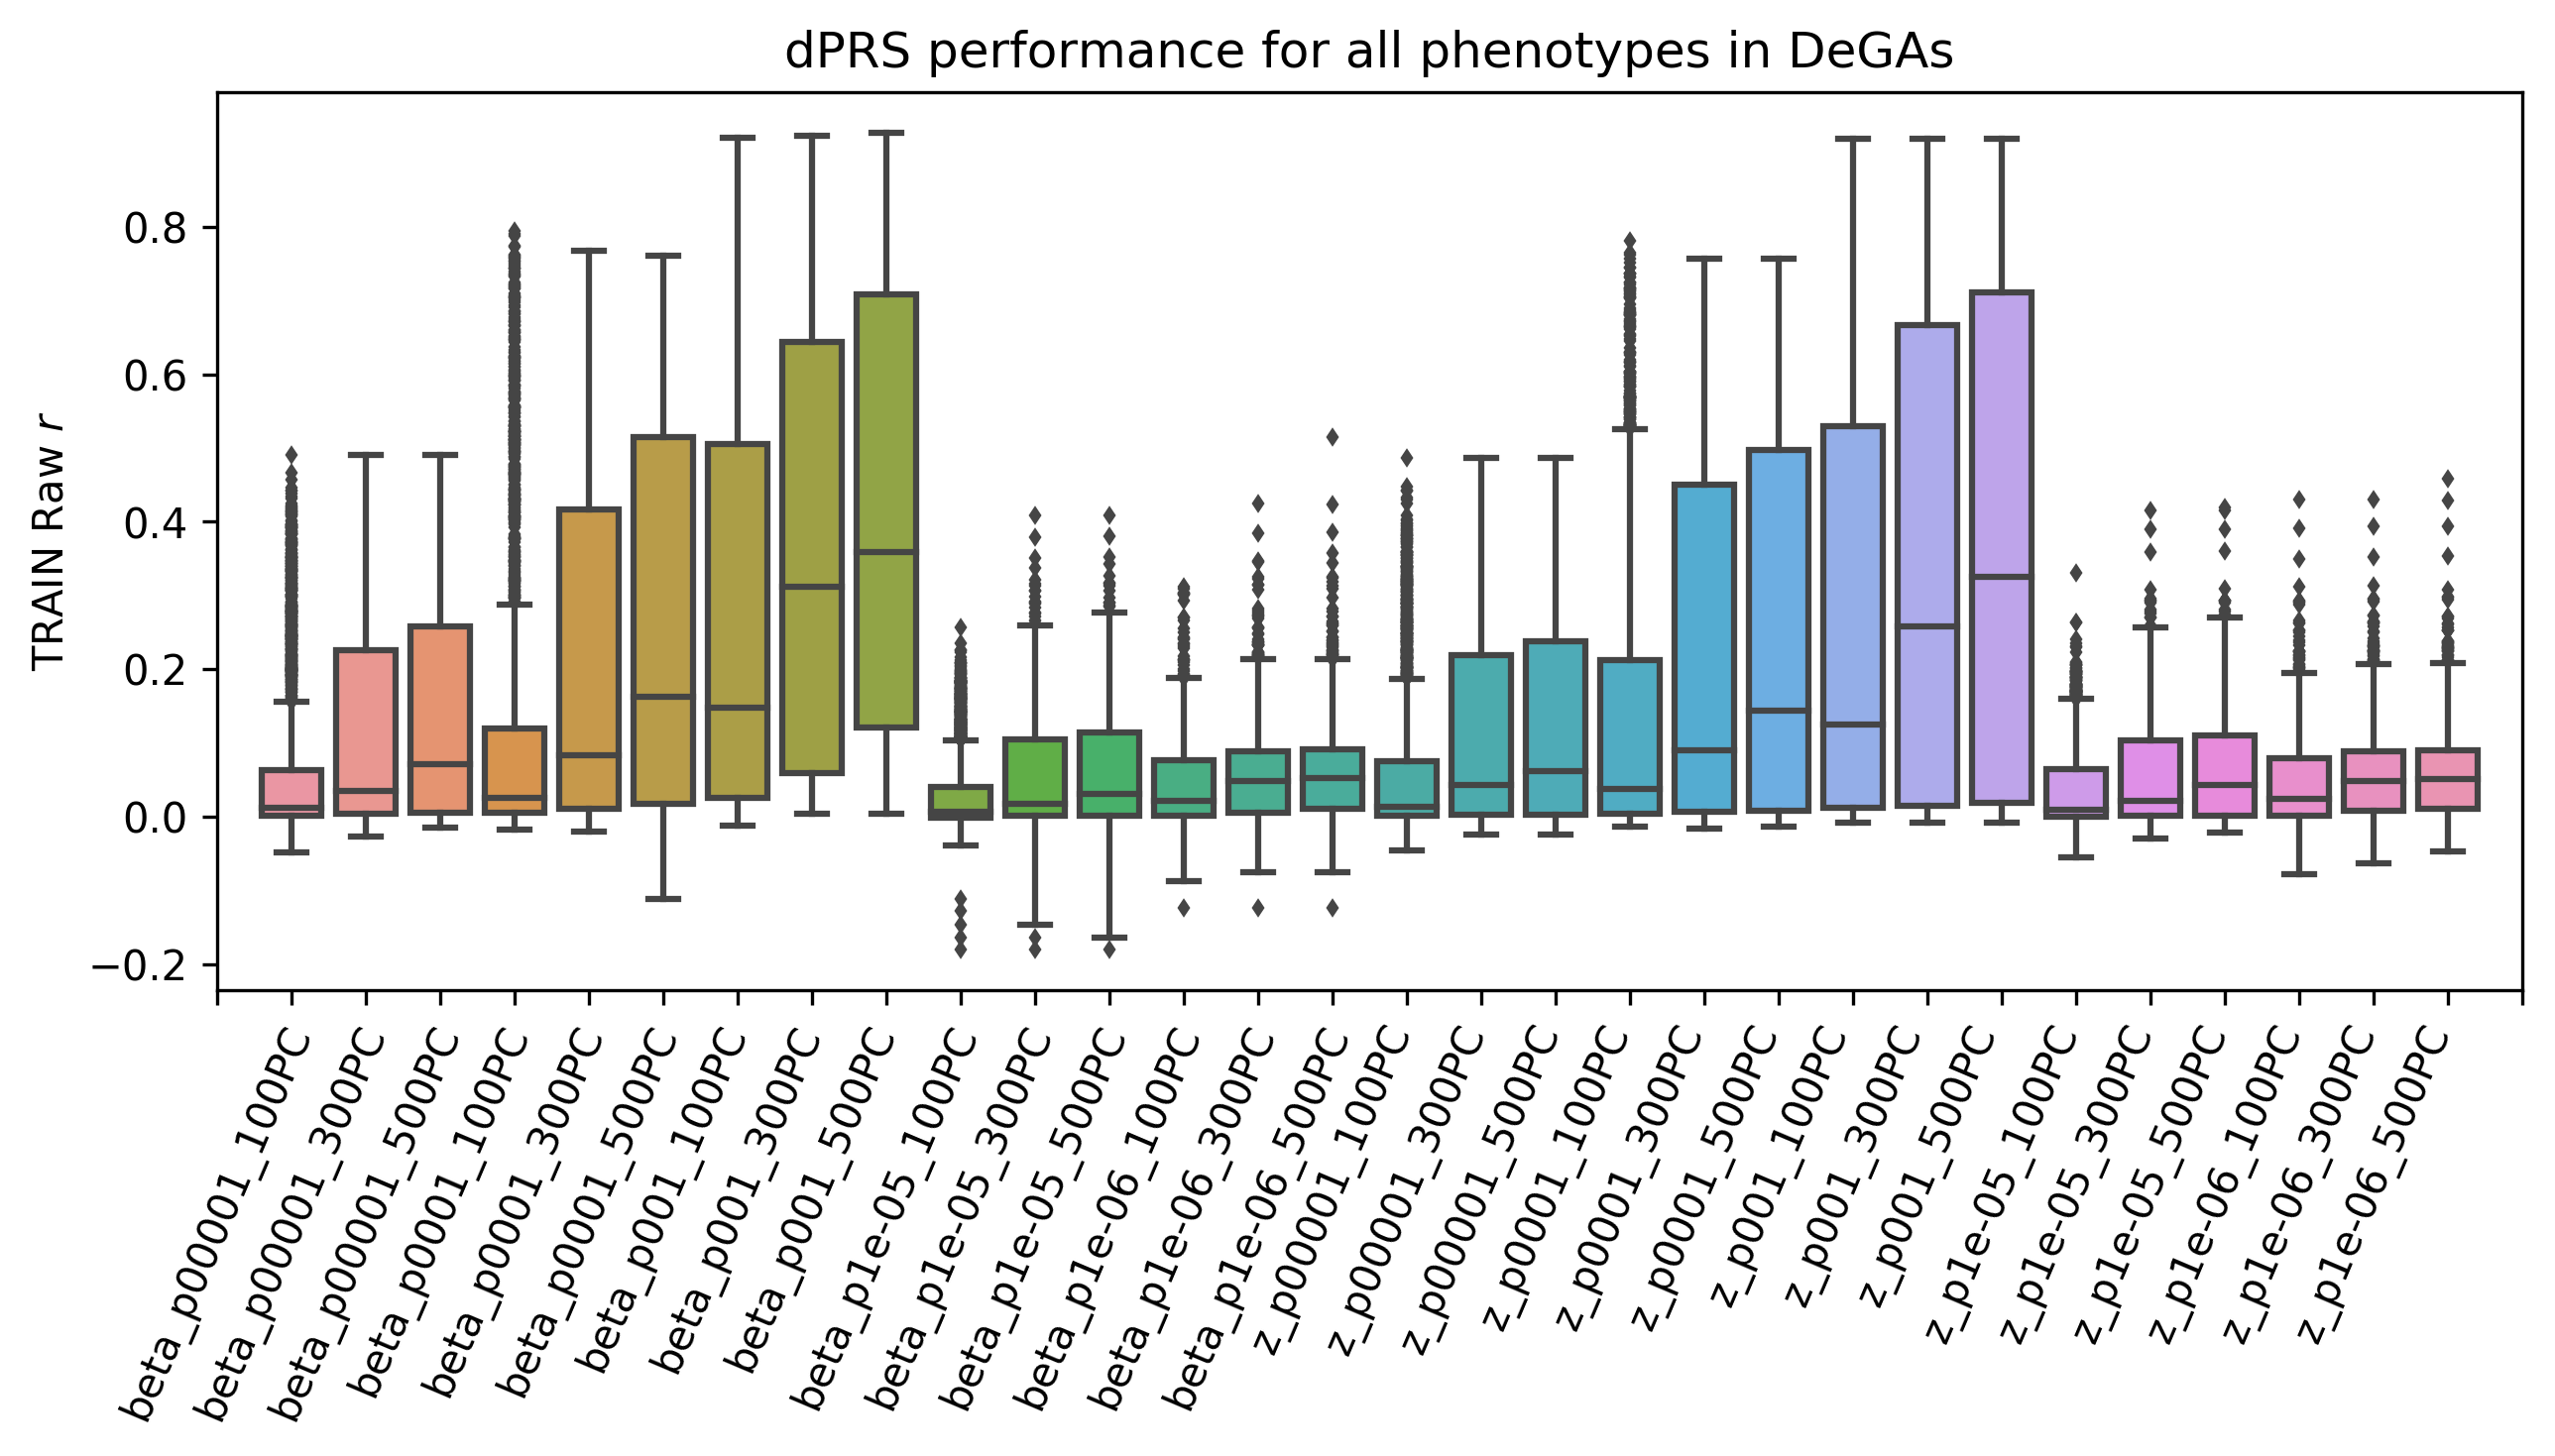

In [5]:
plt.figure(figsize=(10,4),dpi=300)
sns.boxplot(x='dataset',y='rsq',
            data=train.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
            fliersize=2)
plt.xticks(list(range(-1,len(files)+1)), rotation=67), plt.xlabel('')
plt.ylabel(' '.join(['TRAIN',kind.lower().capitalize(),'$r$']))
plt.title('dPRS performance for all phenotypes in DeGAs')
plt.show()

In [6]:
test=pd.DataFrame([datas[ds]['TEST_'+kind] for ds in datas], 
                 index=[ds for ds in datas]).T
test.head()

,beta_p0001_100PC,beta_p1e-06_500PC,beta_p001_500PC,z_p00001_100PC,z_p00001_500PC,z_p1e-05_500PC,beta_p0001_300PC,z_p1e-06_300PC,z_p001_100PC,z_p1e-05_300PC,...,beta_p00001_300PC,beta_p001_100PC,beta_p1e-05_100PC,beta_p1e-05_300PC,beta_p1e-06_300PC,z_p0001_300PC,z_p001_500PC,z_p1e-05_100PC,z_p00001_300PC,beta_p001_300PC
BIN10030500,0.015785,0.002883,0.035595,-0.005400,-0.010976,-0.007665,0.013317,0.004906,0.016003,-0.008030,...,0.015019,0.016595,-0.007901,0.009794,0.010742,0.009486,0.019857,-0.009473,-0.010435,0.034305
BIN10030510,0.015387,0.001262,0.032249,0.002393,-0.004855,0.005681,0.015259,0.011660,0.014764,0.009165,...,0.011670,0.012503,-0.000480,0.013727,0.019629,0.007553,0.016115,-0.012758,-0.003613,0.031649
BIN10030800,-0.007830,0.017557,0.008656,-0.002784,0.015292,0.007154,0.006835,0.004194,0.007628,0.006248,...,0.009018,0.003693,0.008027,0.010807,-0.005247,0.008408,0.012514,-0.004168,0.006786,0.002105
BIN10030820,0.044335,0.049681,0.047214,0.042658,0.044753,0.042013,0.045616,0.042607,0.041152,0.041918,...,0.045700,0.043831,0.043429,0.045981,0.045674,0.043223,0.041309,0.041539,0.043762,0.044049
BIN1020483,0.004827,NaN,0.016237,-0.007021,0.001888,0.002436,0.008438,NaN,0.003590,0.003528,...,-0.008404,0.012492,0.008012,0.000091,NaN,0.002948,0.000770,-0.005468,0.002021,0.012728


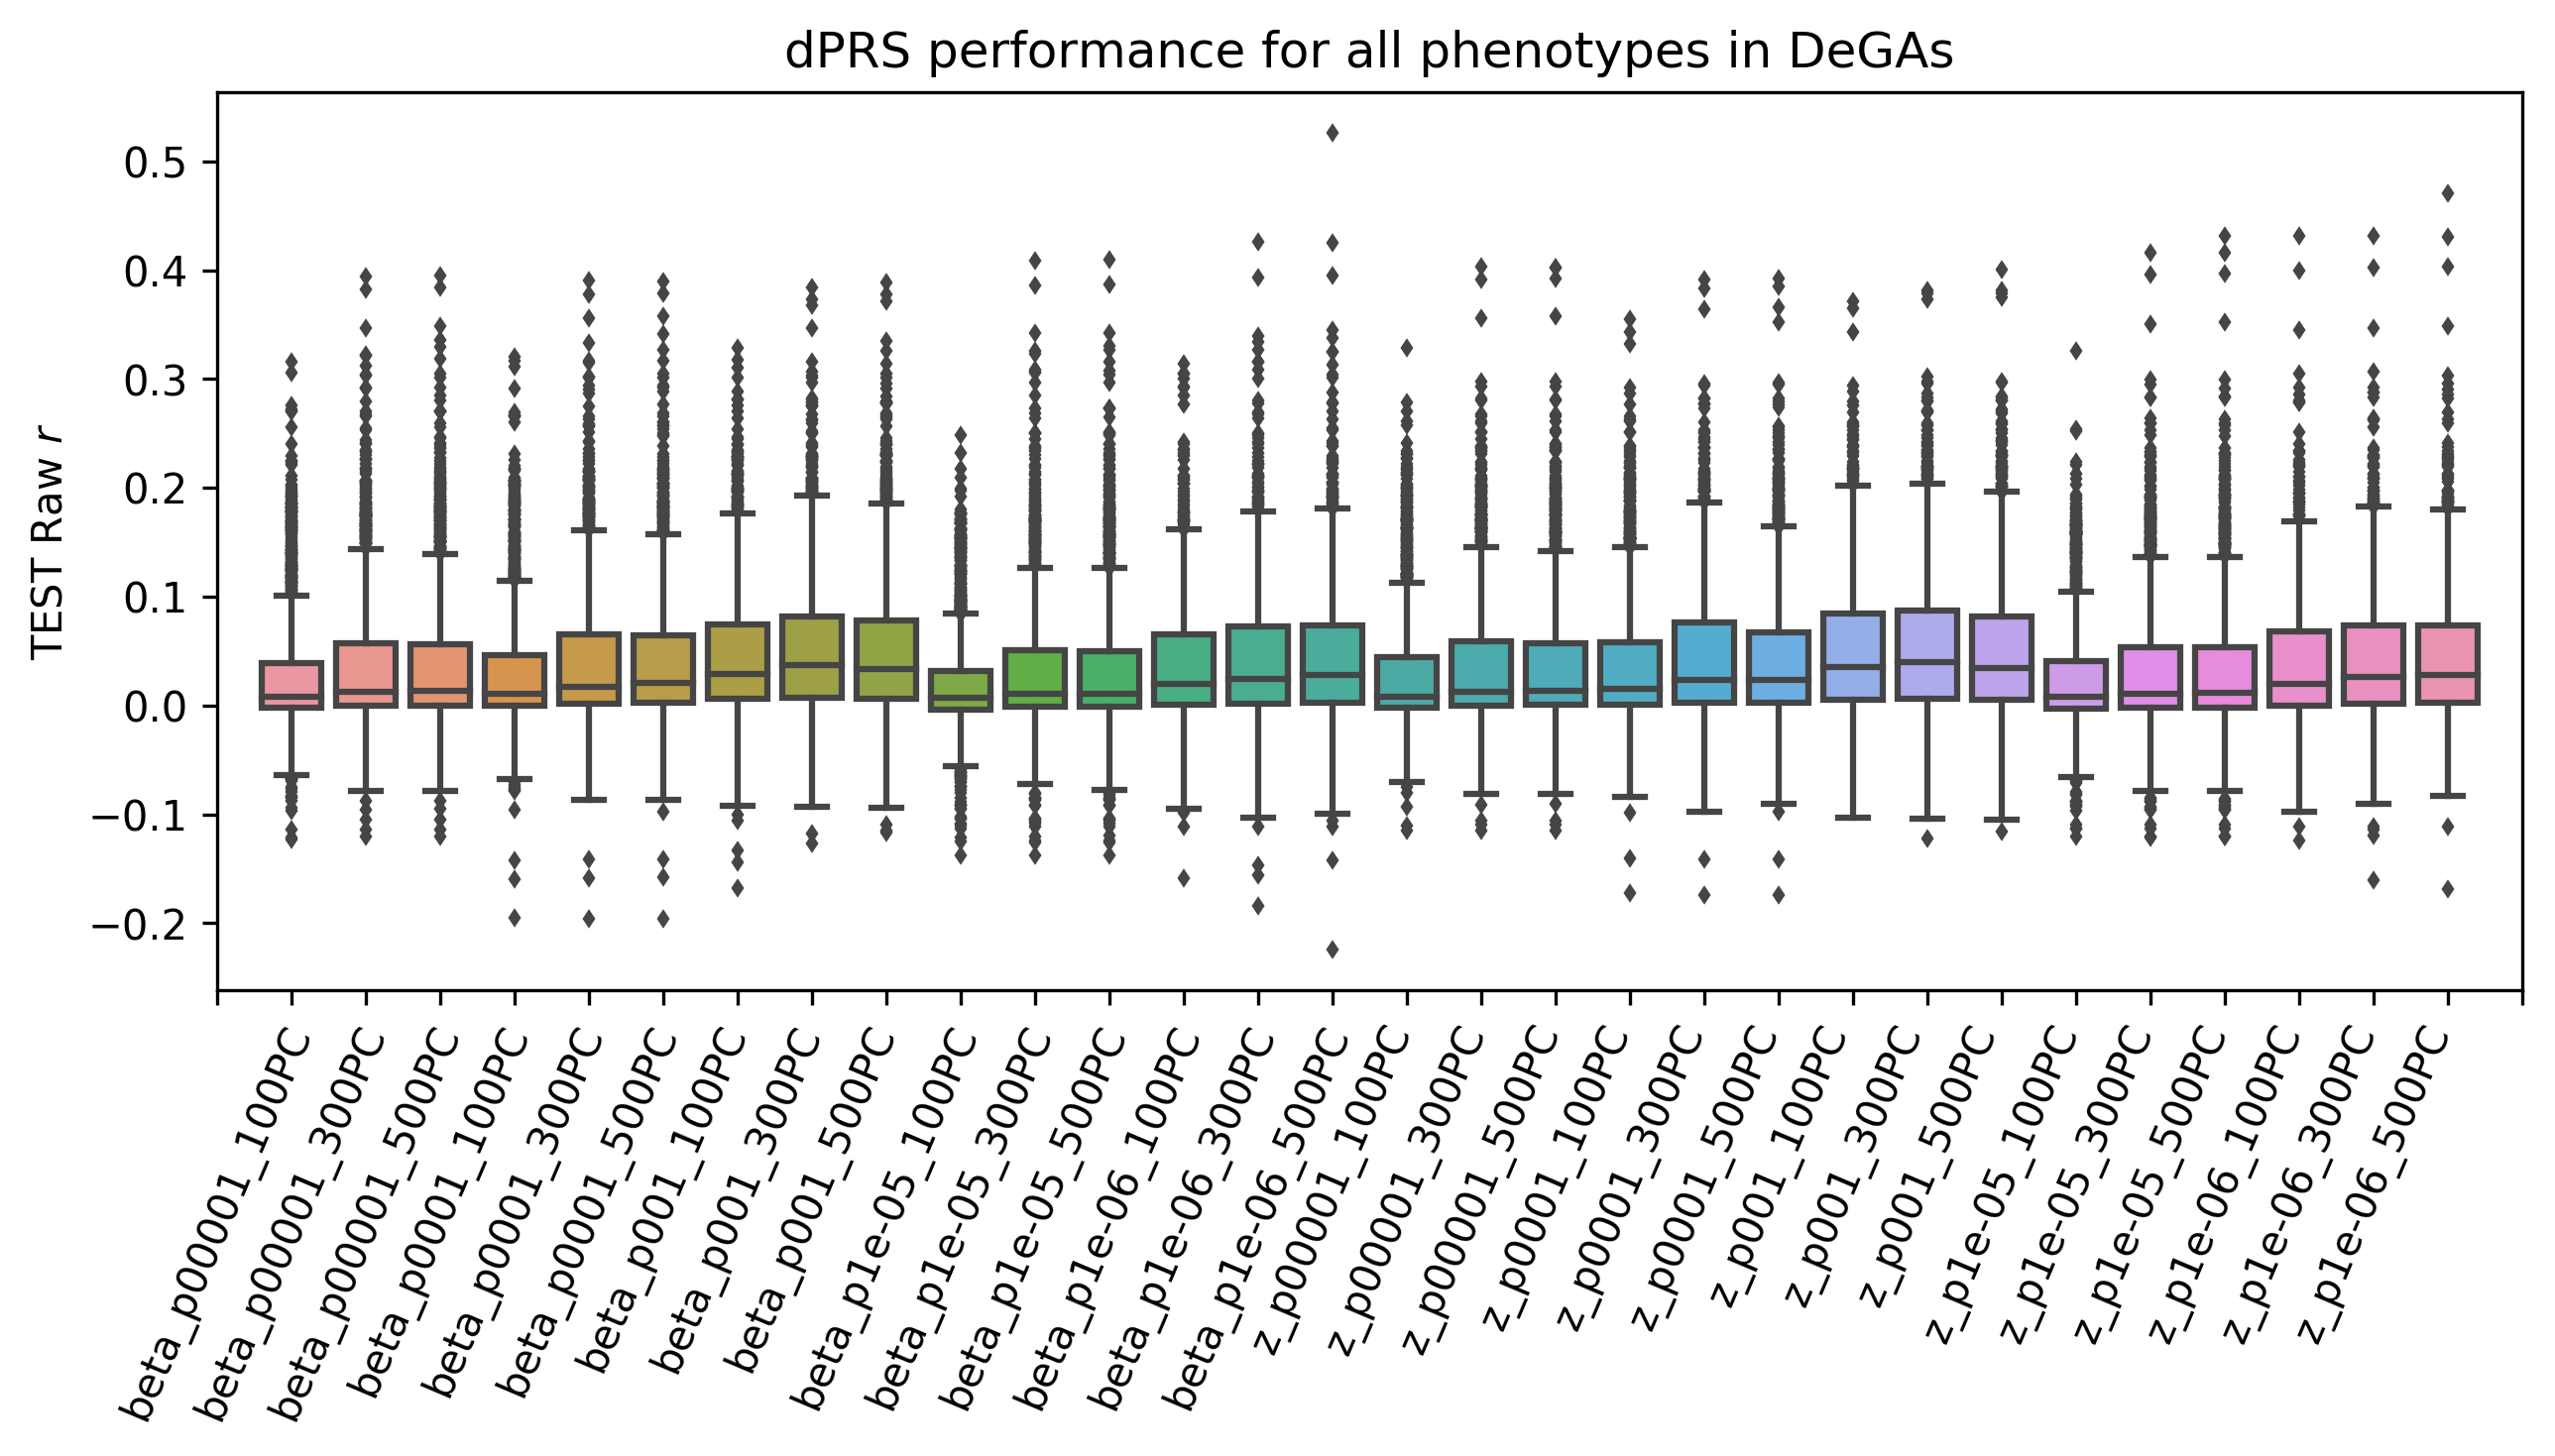

In [7]:
plt.figure(figsize=(10,4),dpi=300)
sns.boxplot(x='dataset',y='rsq',
            data=test.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
            fliersize=2)
           #showfliers=0)
plt.xticks(list(range(-1,len(files)+1)), rotation=67), plt.xlabel('')
plt.ylabel(' '.join(['TEST',kind.lower().capitalize(),'$r$']))
plt.title('dPRS performance for all phenotypes in DeGAs')
plt.show()

In [8]:
test.mean().sort_values()[::-1]

z_p001_300PC         0.053866
z_p001_100PC         0.052247
beta_p001_300PC      0.051799
z_p001_500PC         0.051504
beta_p001_500PC      0.050054
beta_p001_100PC      0.046836
z_p1e-06_500PC       0.046654
beta_p1e-06_500PC    0.046609
z_p0001_300PC        0.045238
z_p1e-06_300PC       0.044533
beta_p1e-06_300PC    0.043607
z_p0001_500PC        0.042819
beta_p0001_500PC     0.040991
beta_p0001_300PC     0.039865
z_p1e-06_100PC       0.039307
beta_p1e-06_100PC    0.037052
z_p0001_100PC        0.037005
z_p00001_300PC       0.036942
z_p00001_500PC       0.036334
beta_p00001_300PC    0.035775
beta_p00001_500PC    0.035217
z_p1e-05_500PC       0.032839
z_p1e-05_300PC       0.032020
beta_p1e-05_500PC    0.031556
beta_p0001_100PC     0.031545
beta_p1e-05_300PC    0.031021
z_p00001_100PC       0.028527
beta_p00001_100PC    0.026590
z_p1e-05_100PC       0.024840
beta_p1e-05_100PC    0.019723
dtype: float64

In [9]:
wilcoxon(test[test.mean().sort_values()[::-1].index[0]], 
         test[test.mean().sort_values()[::-1].index[1]])

/home/users/magu/.local/lib/python2.7/site-packages/scipy/stats/morestats.py:2400: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/home/users/magu/.local/lib/python2.7/site-packages/scipy/stats/morestats.py:2401: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


WilcoxonResult(statistic=842621.0, pvalue=2.1876712555888002e-08)

In [10]:
datas['z_p001_300PC'].sort_values('TRAIN_'+kind).dropna()[::-1].head()

,TRAIN_RAW,TEST_RAW
PHE,,
INI22426,0.918711,-0.050381
INI23278,0.917606,-0.028438
INI20482,0.914415,-0.033526
INI22410,0.910861,-0.057198
INI23247,0.910458,-0.092412


In [11]:
datas['z_p001_300PC'].sort_values('TEST_'+kind).dropna()[::-1].head()

,TRAIN_RAW,TEST_RAW
PHE,,
INI10030840,0.423518,0.381525
INI20030660,0.427652,0.378198
INI30100,0.426706,0.373612
INI20030790,0.315850,0.302192
INI20030760,0.393043,0.297196


In [12]:
pd.DataFrame([datas[d].loc['INI50',:] for d in datas], index=[d for d in datas]).sort_values('TEST_'+kind)[::-1]

,TRAIN_RAW,TEST_RAW
beta_p001_100PC,0.350121,0.280958
beta_p001_300PC,0.349567,0.278527
beta_p001_500PC,0.348823,0.277934
z_p001_300PC,0.325773,0.269048
z_p001_500PC,0.324907,0.268226
beta_p0001_100PC,0.301053,0.259798
z_p001_100PC,0.310269,0.256273
beta_p0001_300PC,0.293211,0.251396
beta_p0001_500PC,0.292362,0.250638
z_p0001_300PC,0.277218,0.242247


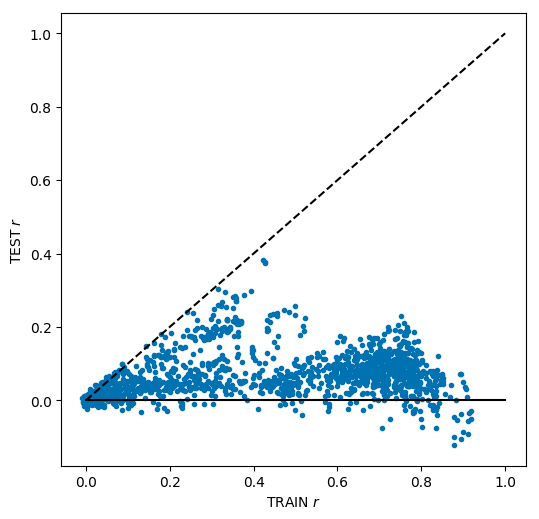

In [13]:
plt.figure(figsize=(6,6), dpi=100)
plt.plot(datas['z_p001_300PC']['TRAIN_'+kind], 
         datas['z_p001_300PC']['TEST_'+kind], '.')
plt.plot([0,1],[0,1],'k--')
plt.plot([0,1],[0,0],'k-')
plt.xlabel('TRAIN '+'$r$'), plt.ylabel('TEST '+'$r$')
plt.show()

In [14]:
npzs = glob.glob('/oak/stanford/groups/mrivas/projects/degas-risk/datasets/train/tsvd/*20190805*.npz')
print('\n'.join(map(os.path.basename,npzs)))

all_beta_center_p1e-06_20190805_500PCs.npz
all_z_center_p00001_20190805_500PCs.npz
all_beta_center_p00001_20190805_500PCs.npz
all_beta_center_p001_20190805_500PCs.npz
all_z_center_p1e-06_20190805_500PCs.npz
all_z_center_p0001_20190805_500PCs.npz
all_z_center_p1e-05_20190805_500PCs.npz
all_beta_center_p1e-05_20190805_500PCs.npz
all_beta_center_p0001_20190805_500PCs.npz
all_z_center_p001_20190805_500PCs.npz


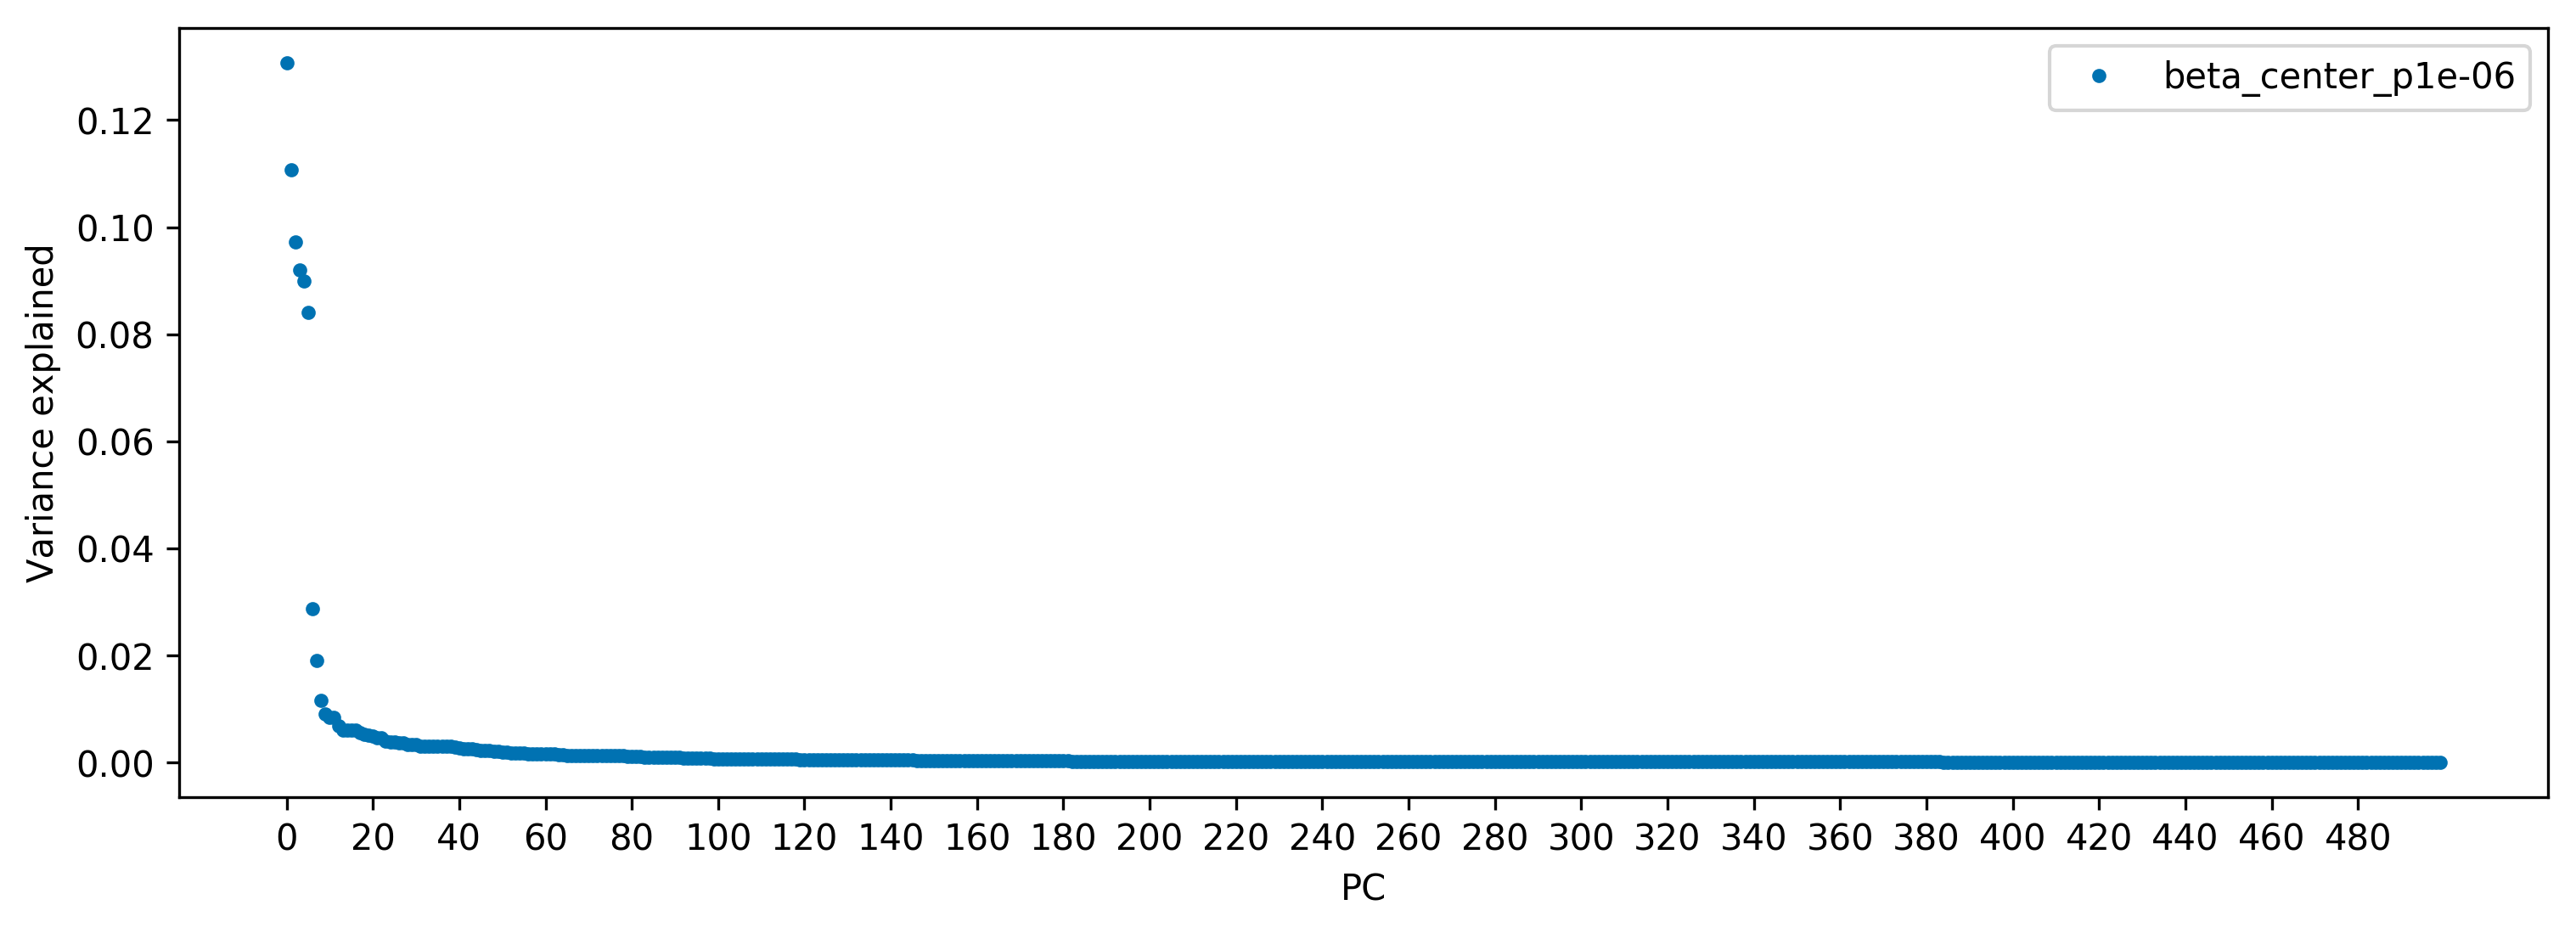

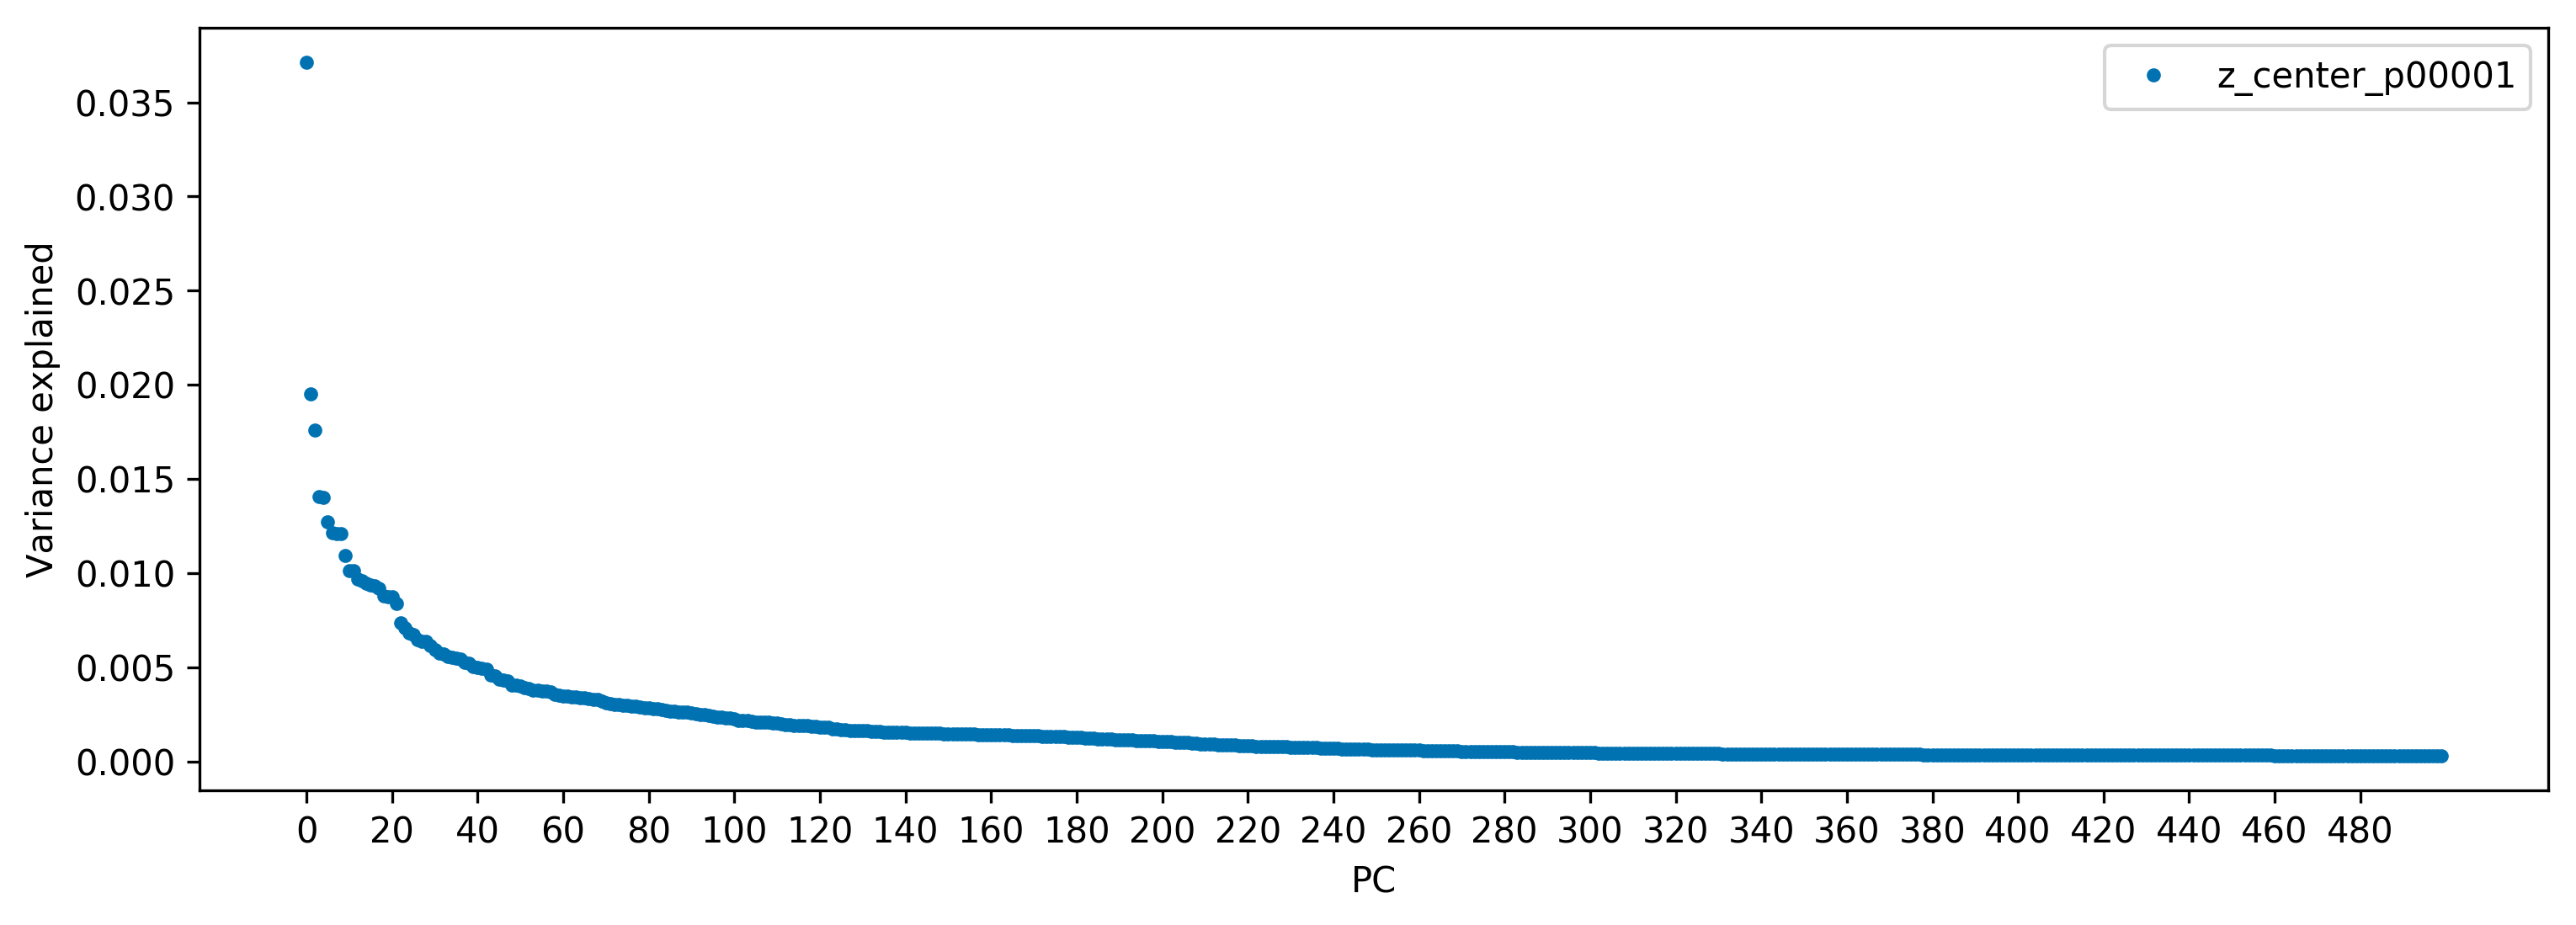

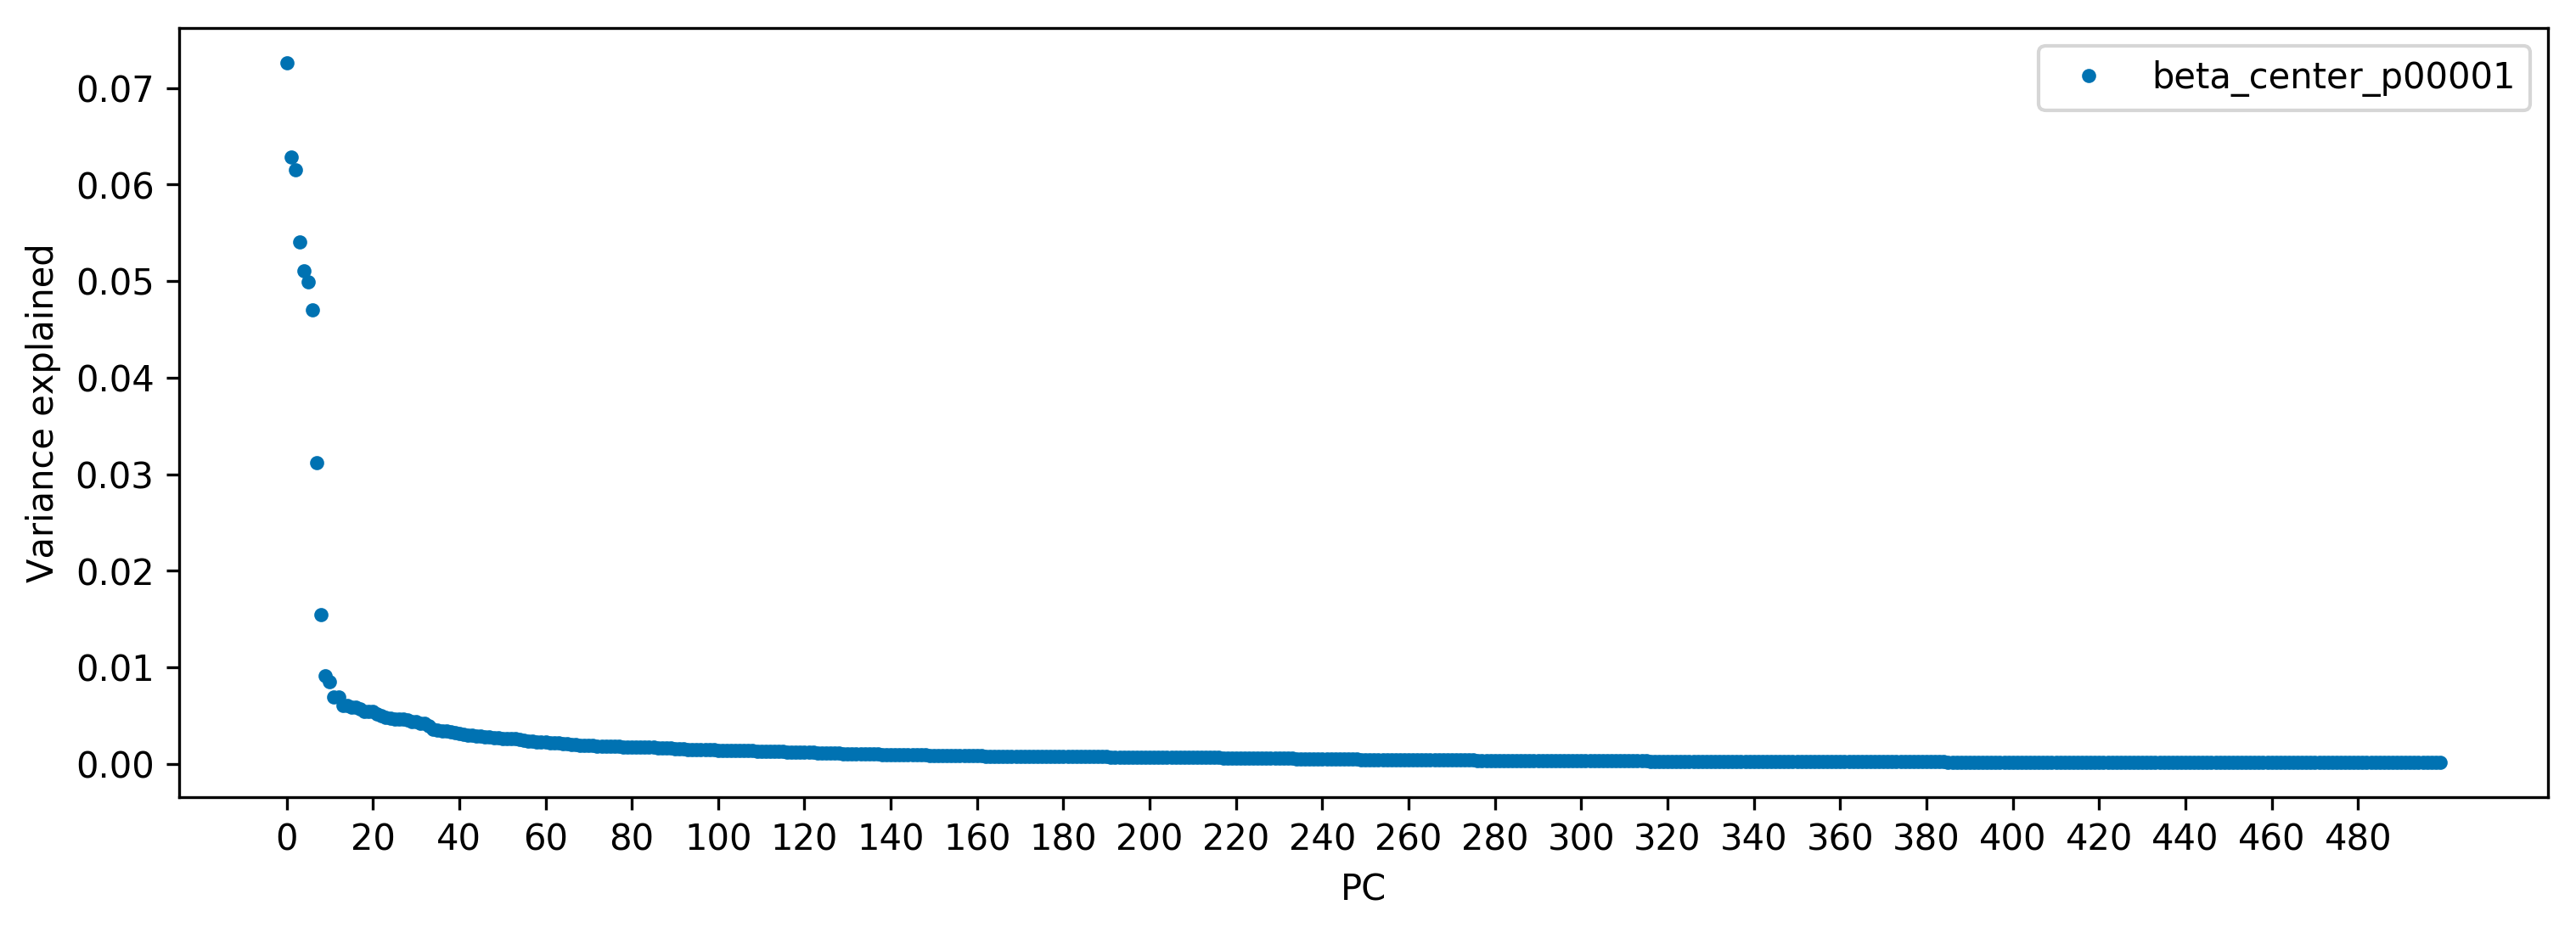

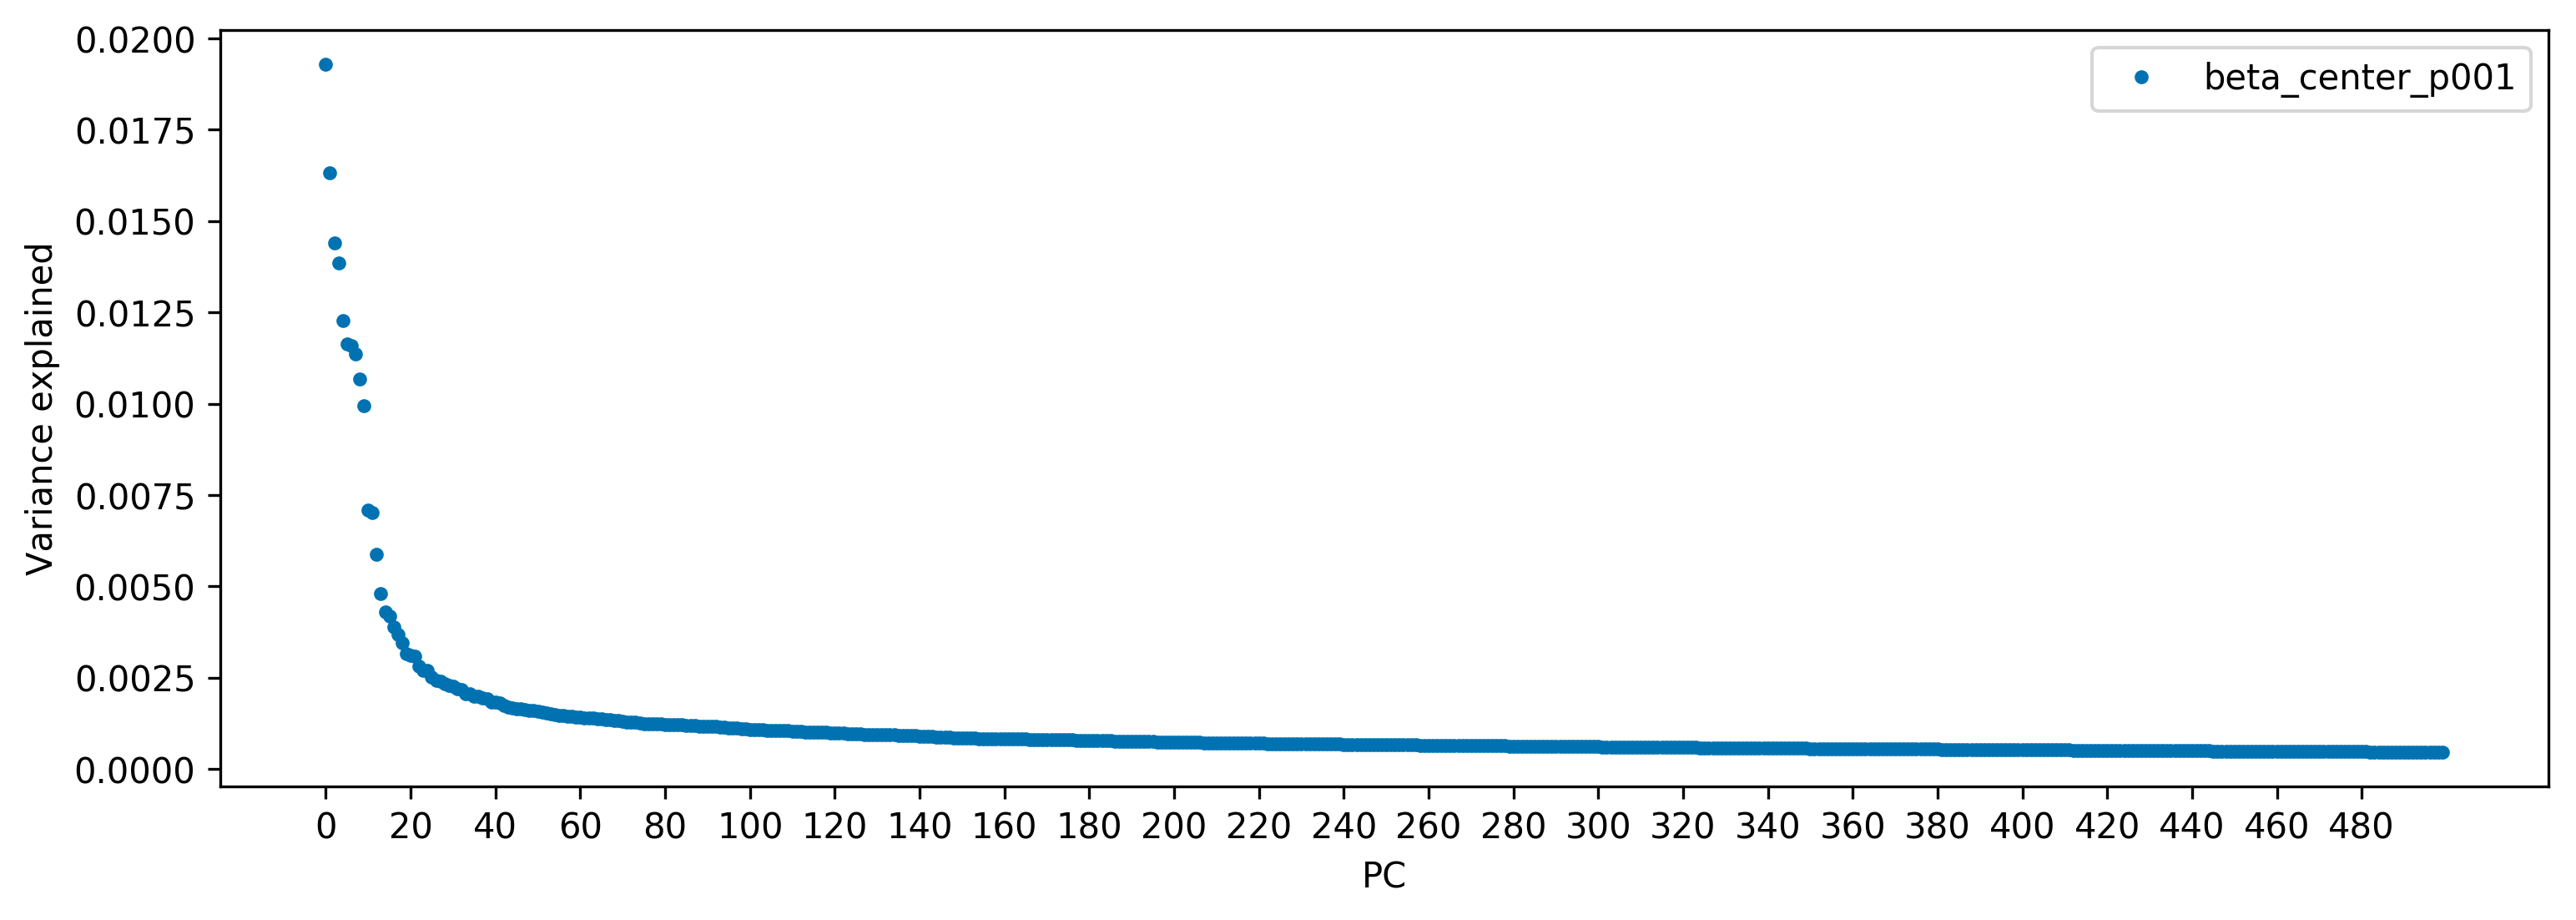

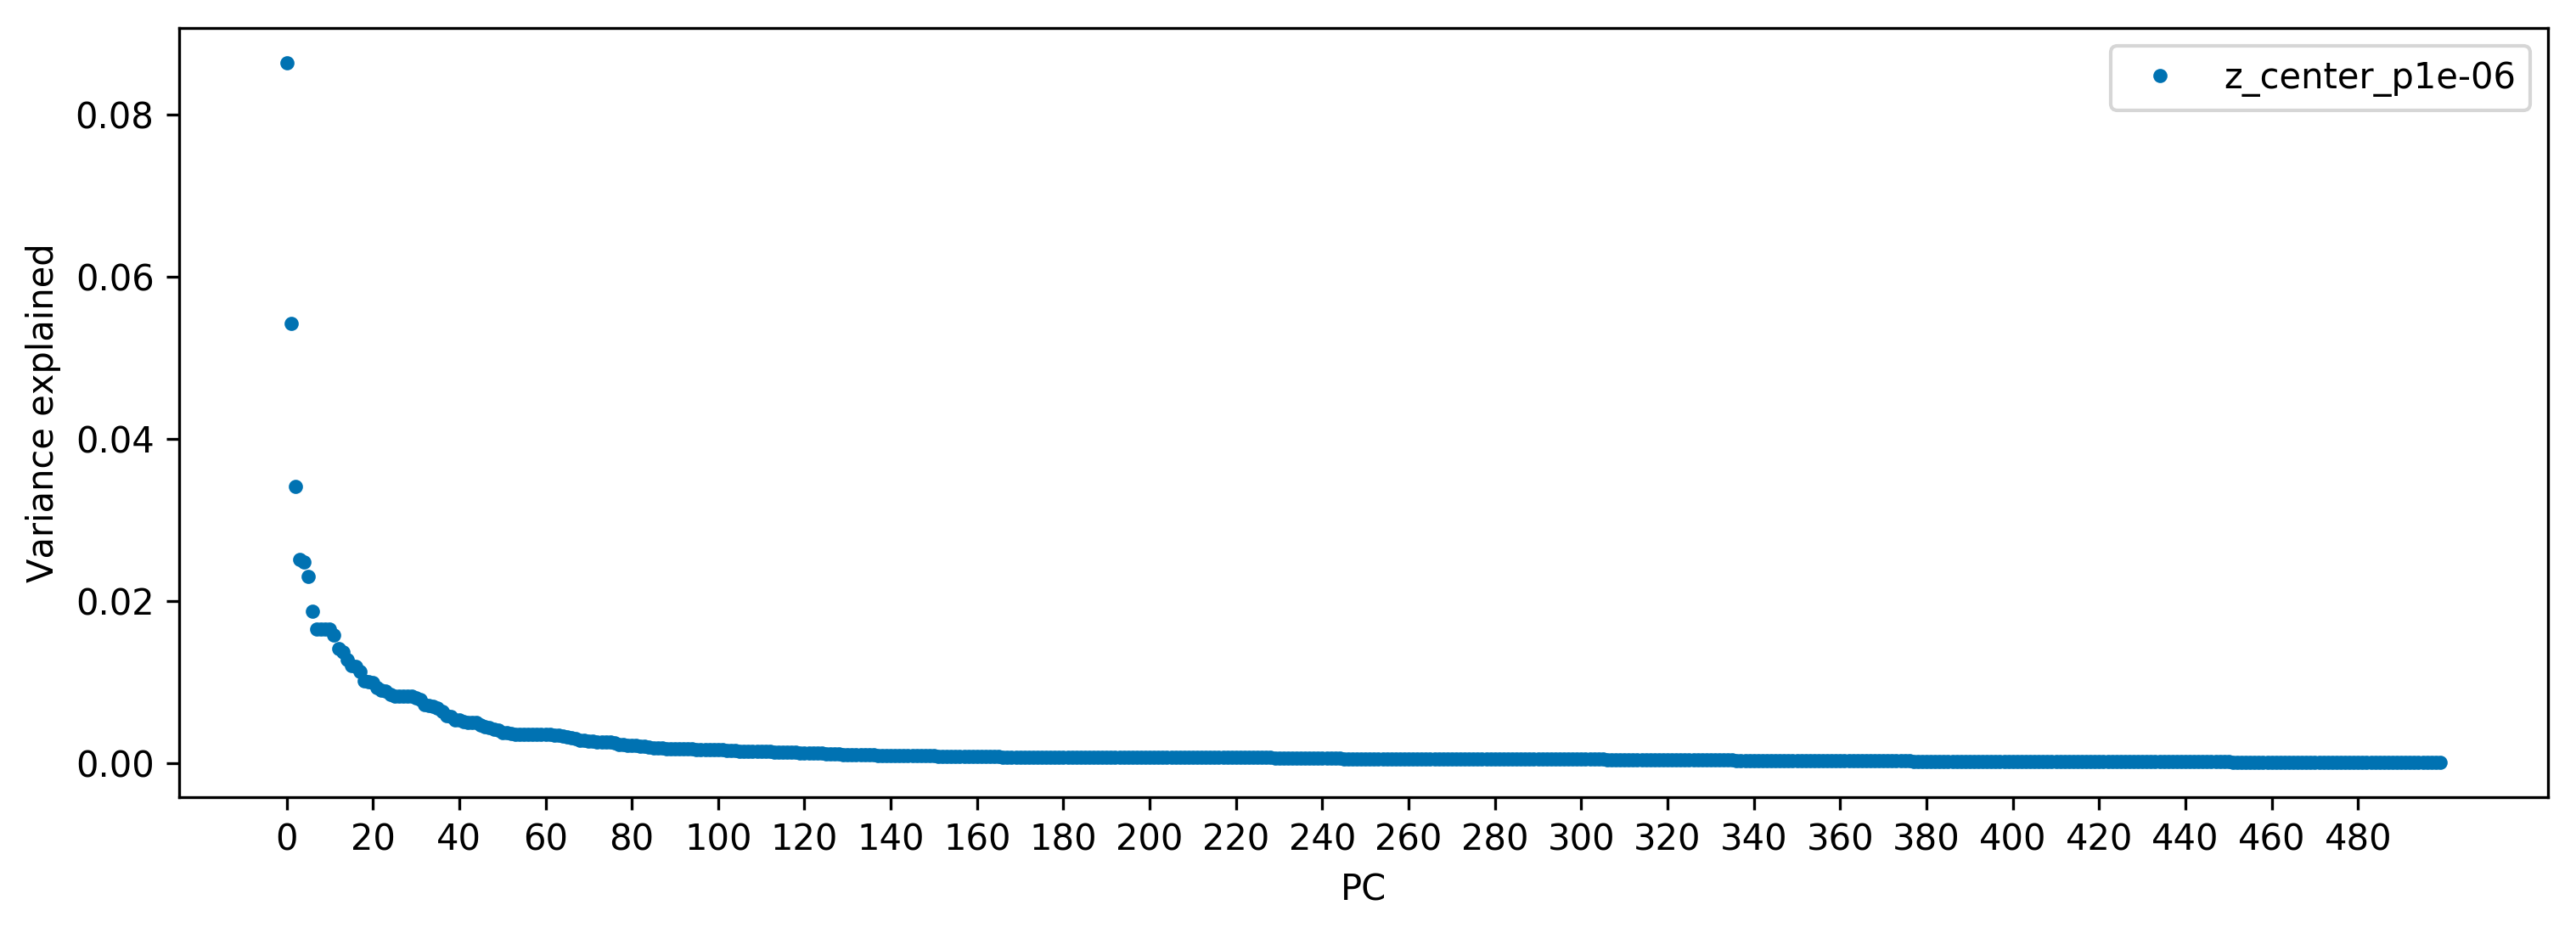

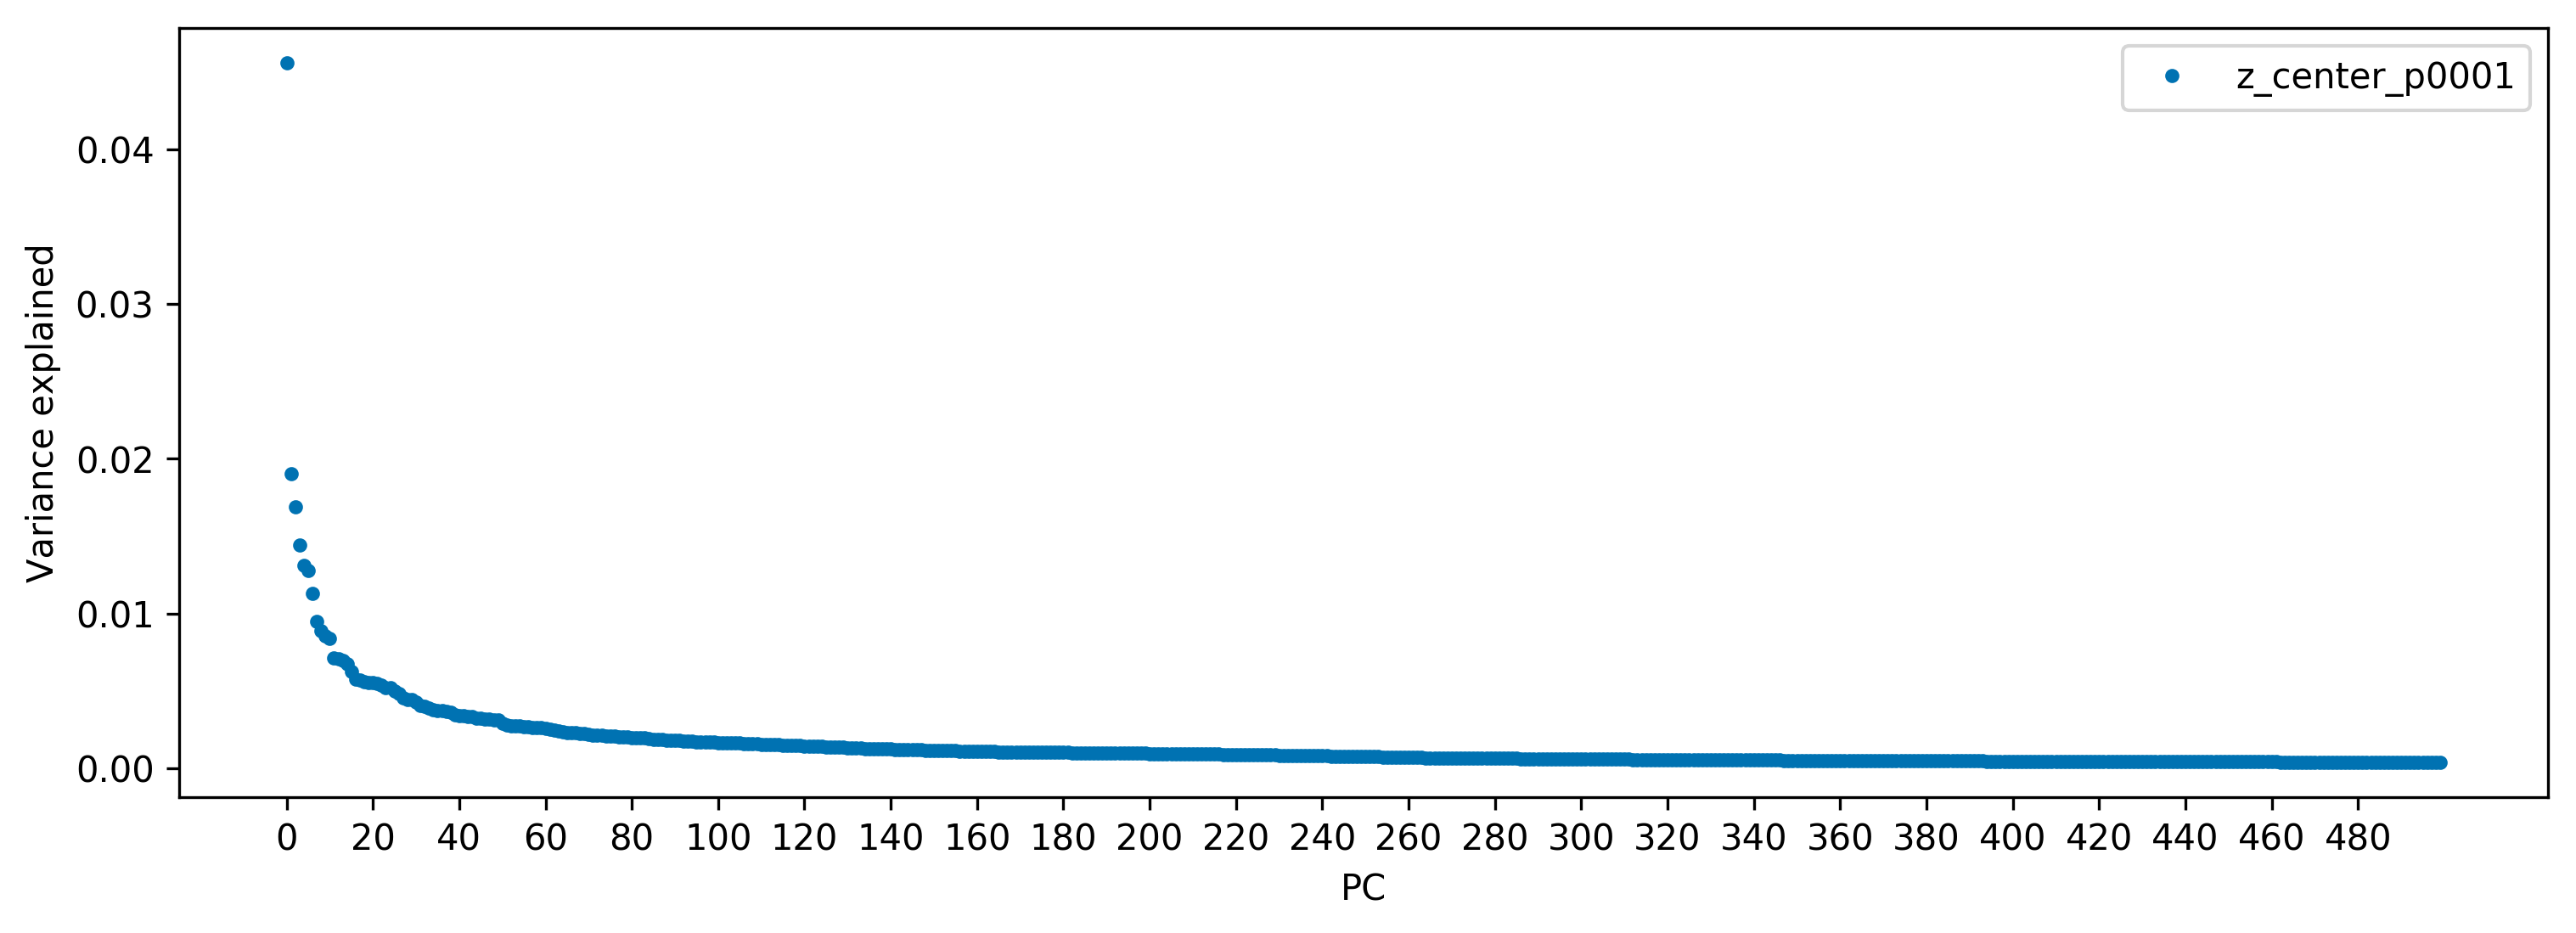

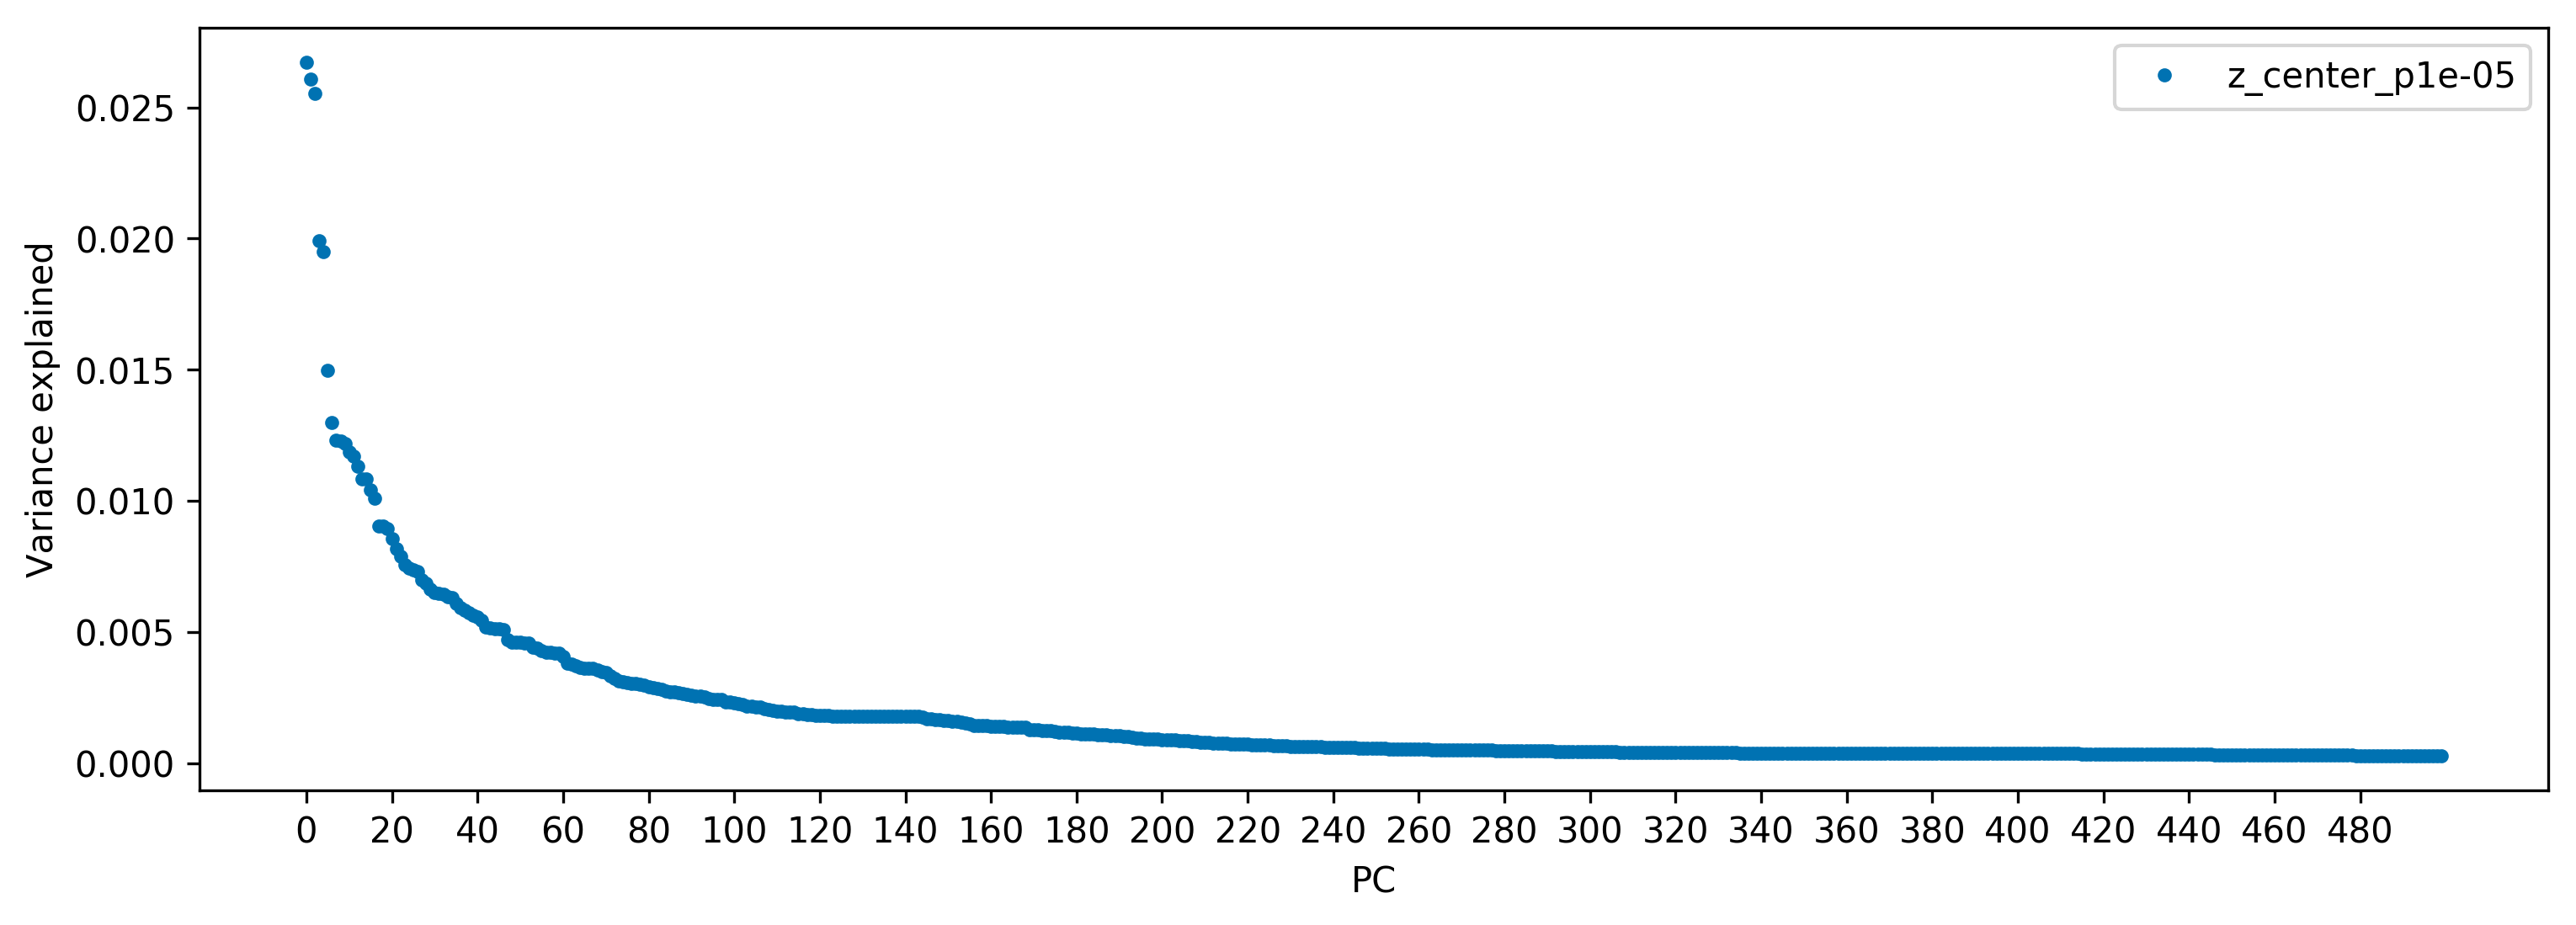

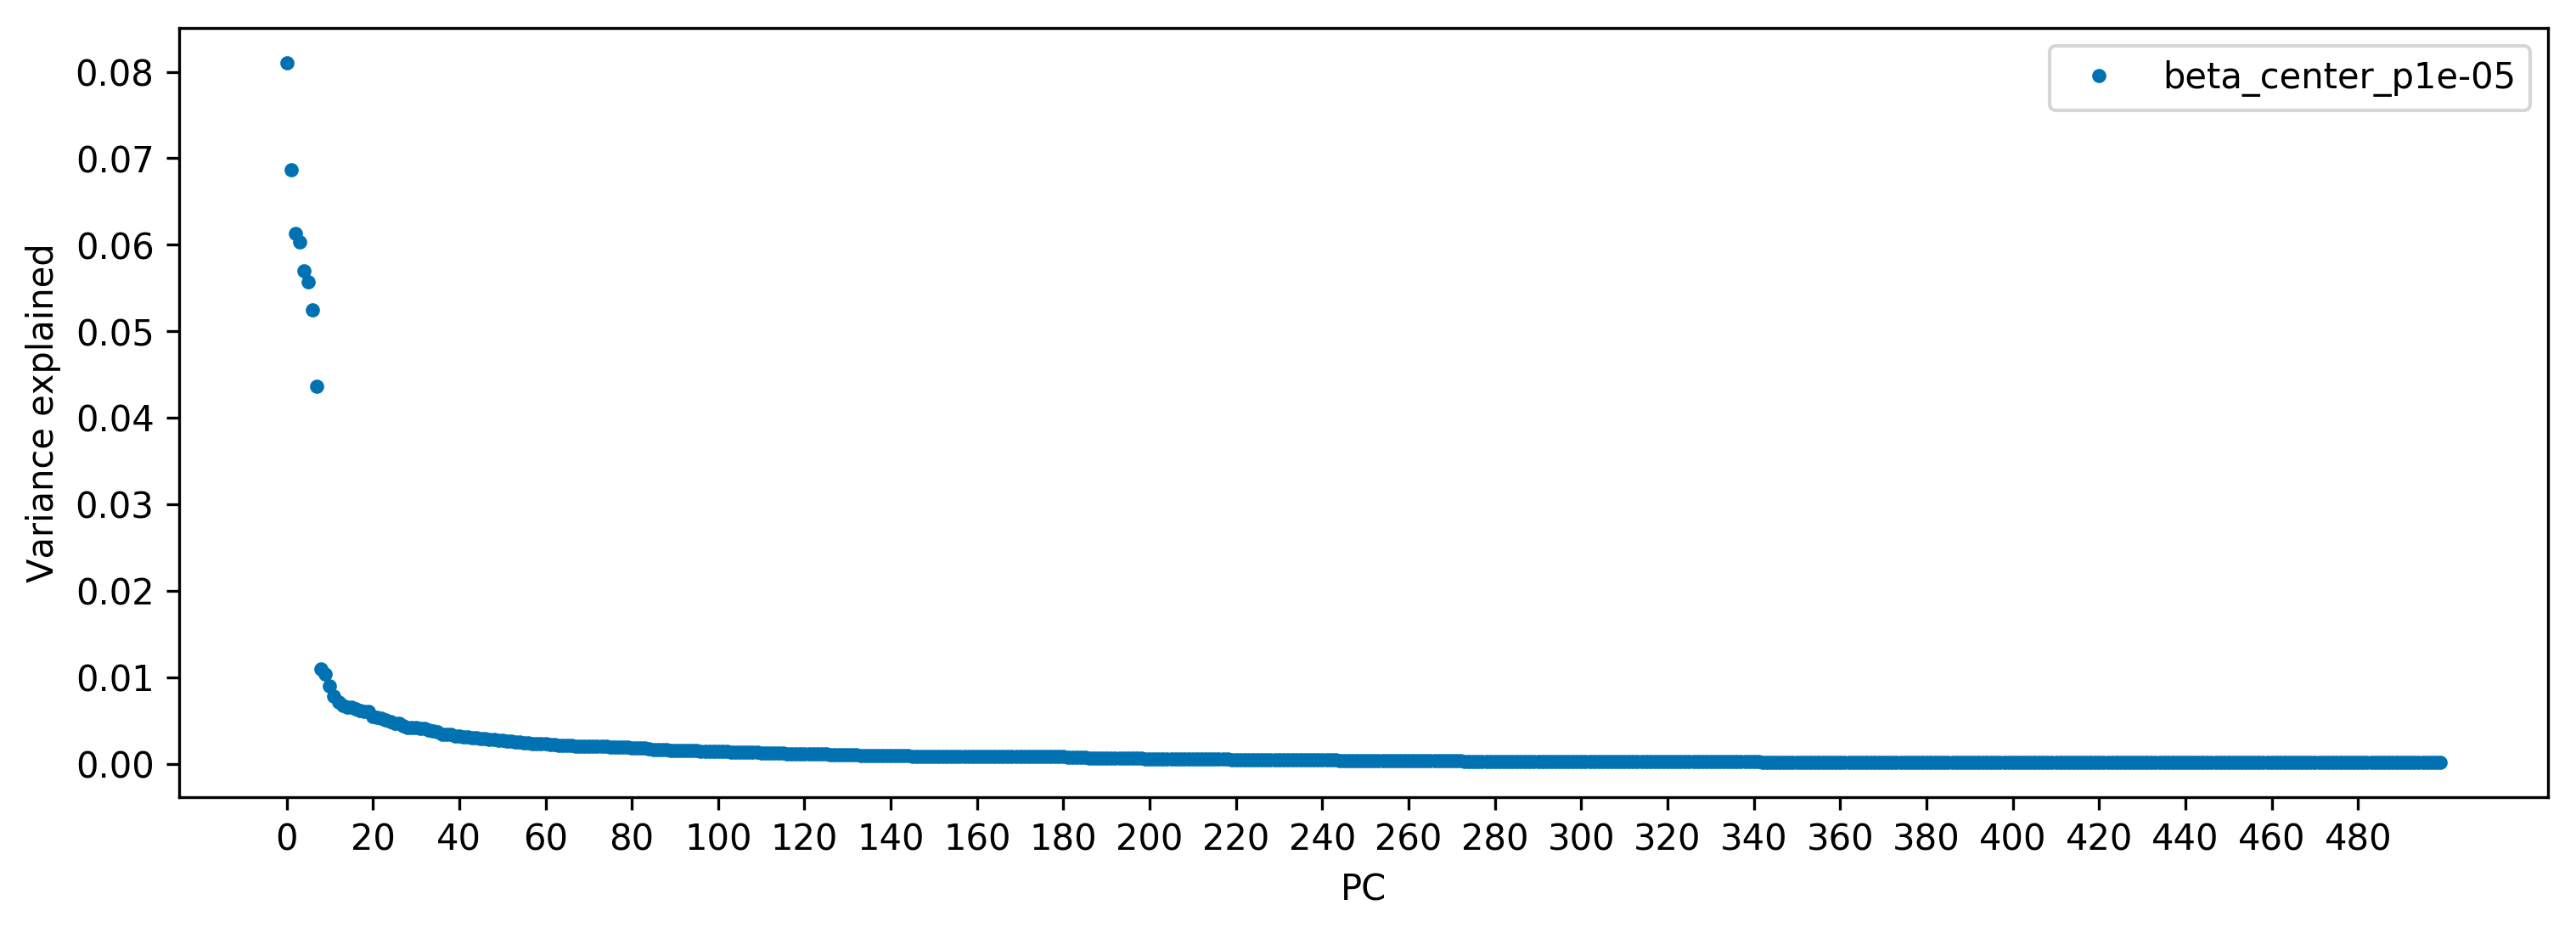

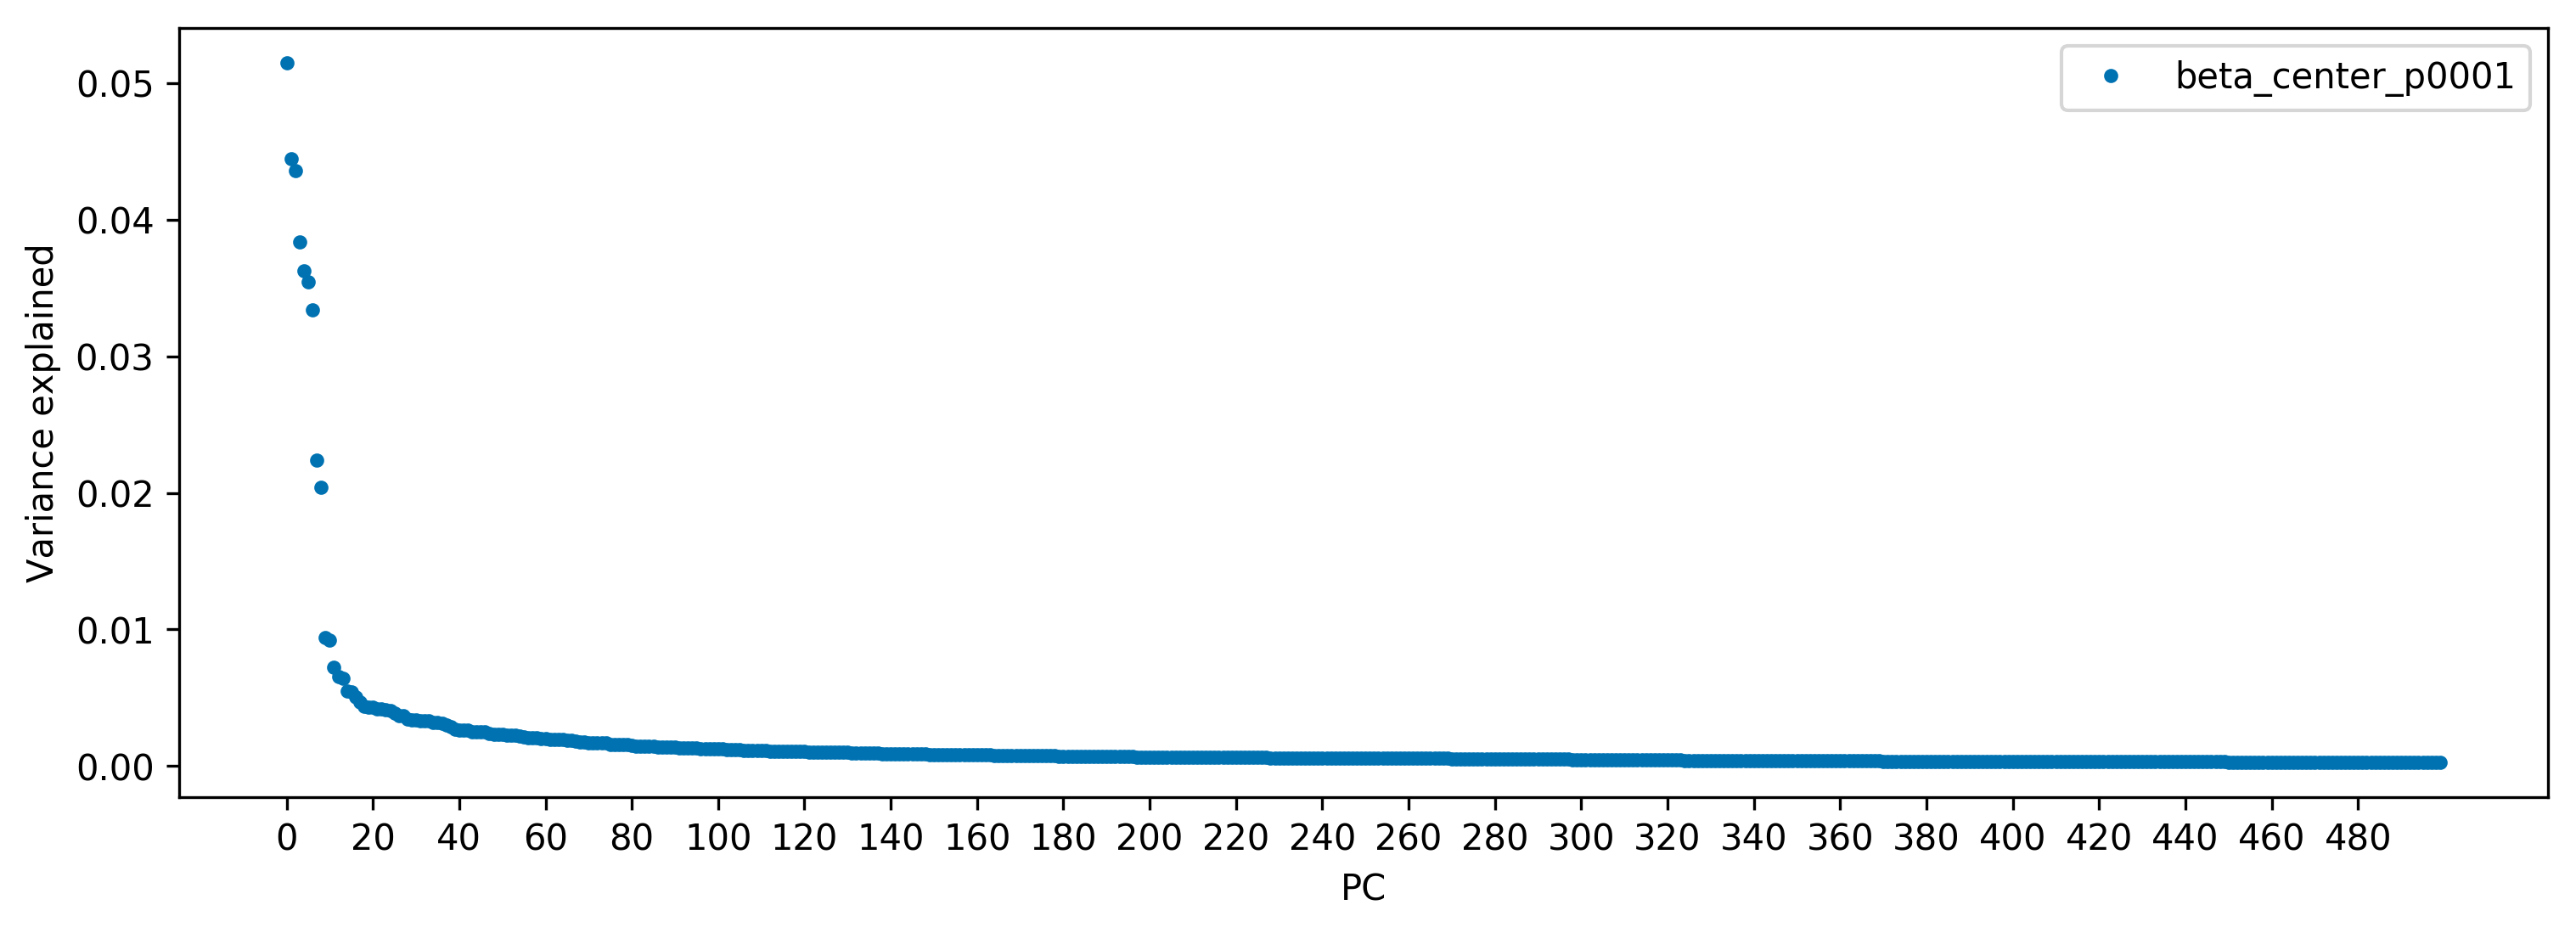

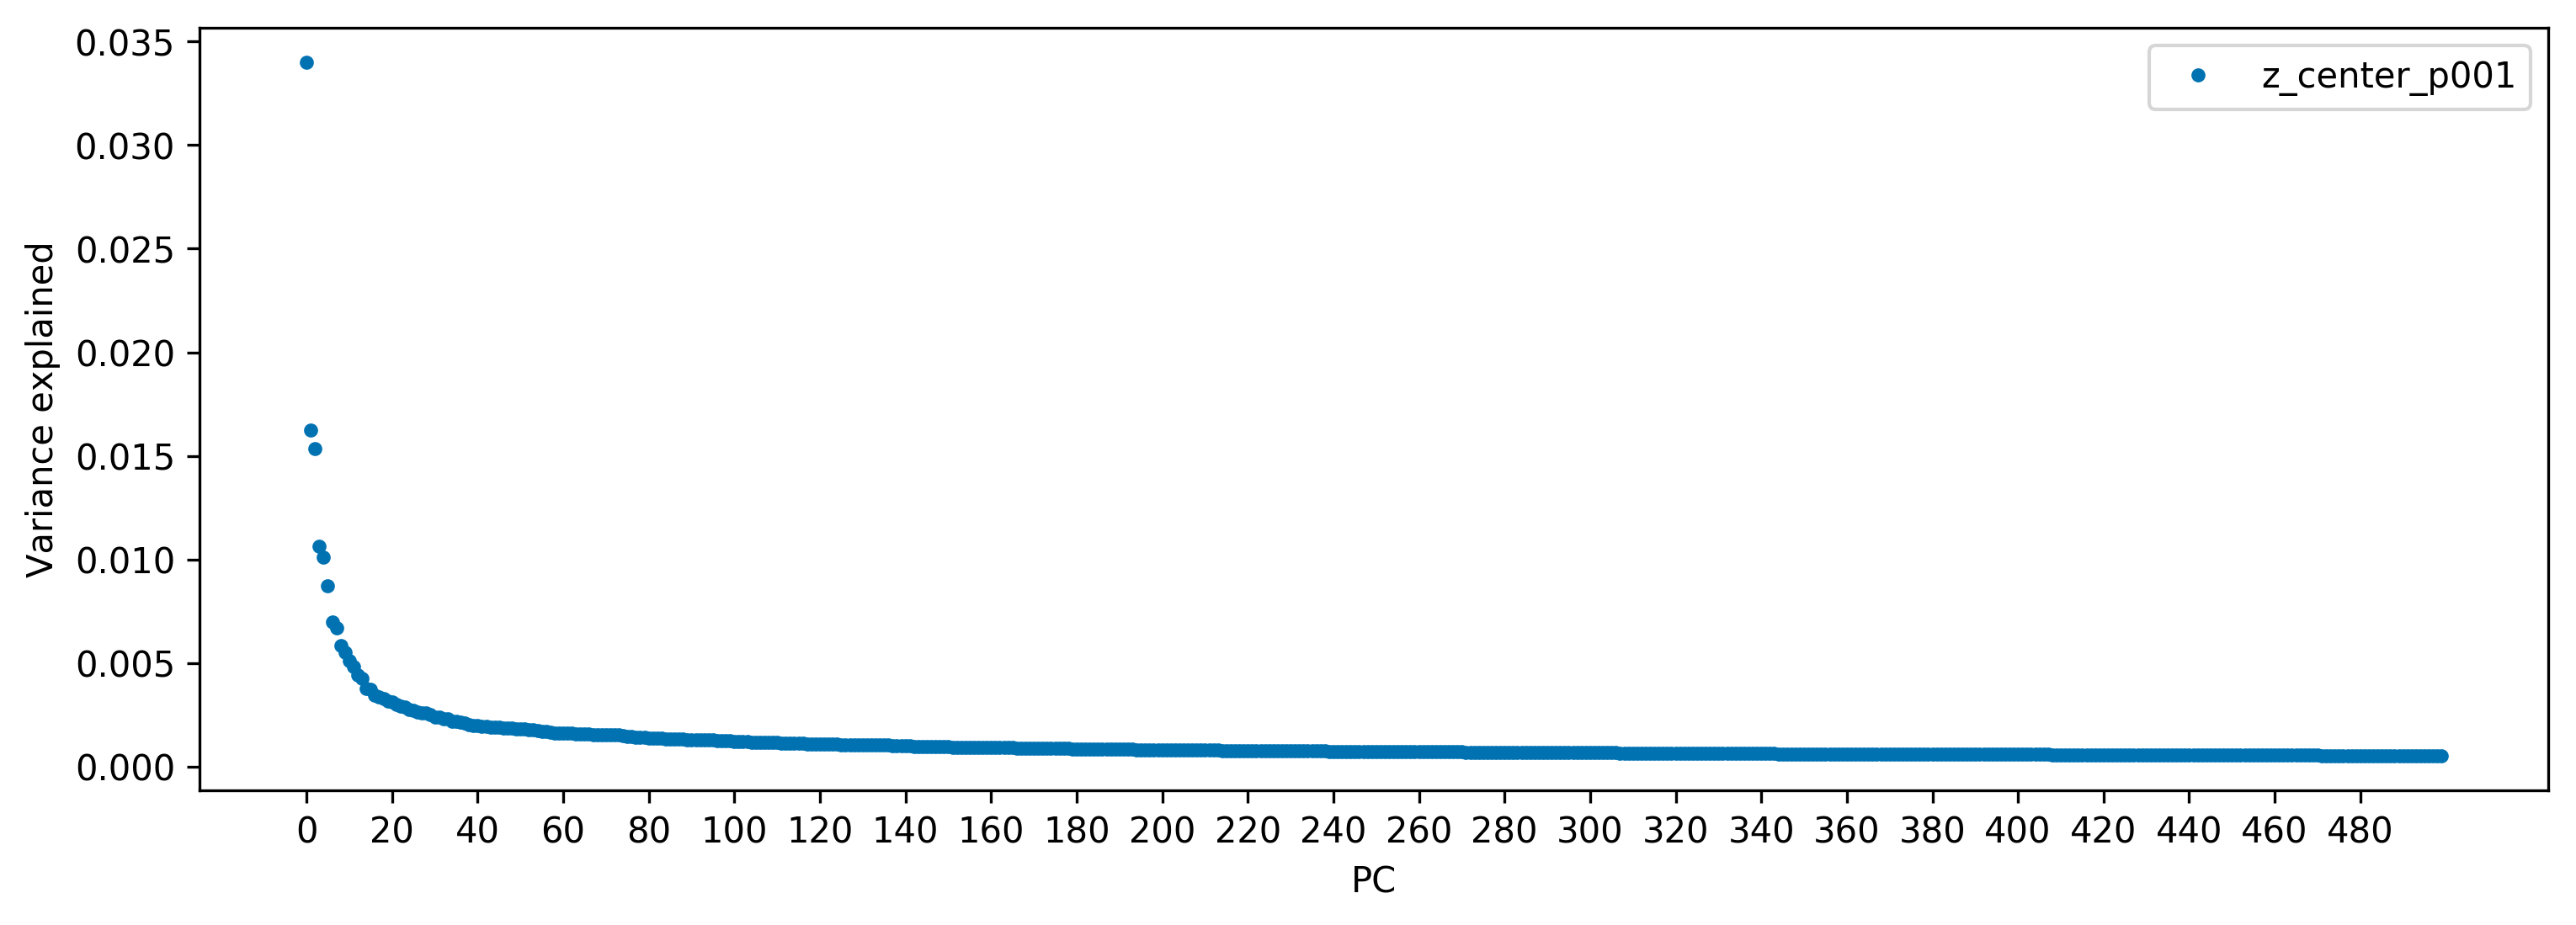

In [15]:
for npz in npzs:
    z=np.load(npz)
    plt.figure(figsize=(12,4), dpi=300)
    plt.plot(np.arange(z['D'].shape[0]), z['variance_explained_ratio'], '.')
    plt.xticks(np.arange(0,z['D'].shape[0],20))
    plt.xlabel('PC'),plt.ylabel('Variance explained')
    # plt.plot([0,z['D'].shape[0]],[1.0/z['V'].shape[0],1.0/z['V'].shape[0]], 'k--')
    plt.legend([os.path.splitext(os.path.basename(npz))[0][4:-16]]) #, 'Isotropic variance'])
    plt.show()